In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping

In [5]:
df = pd.read_csv('cancer_classification.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


## EDA

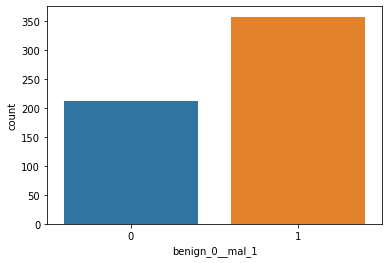

In [62]:
sns.countplot(x='benign_0__mal_1' , data = df)

In [8]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


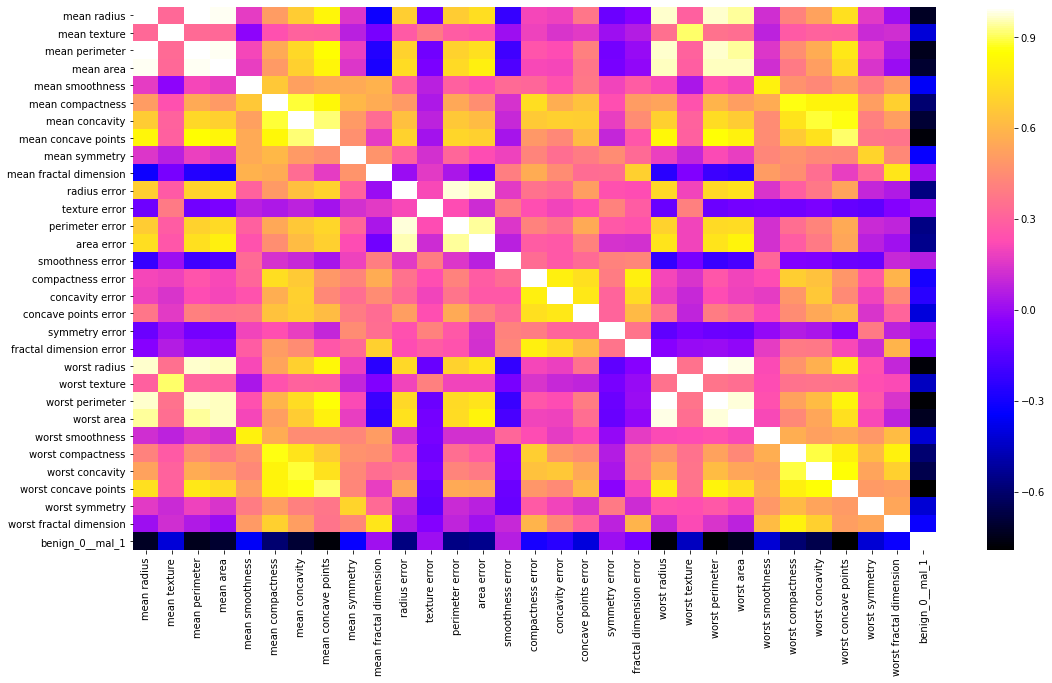

In [15]:
plt.figure(figsize = (18 , 10))
sns.heatmap(df.corr() , cmap = 'gnuplot2')

In [16]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

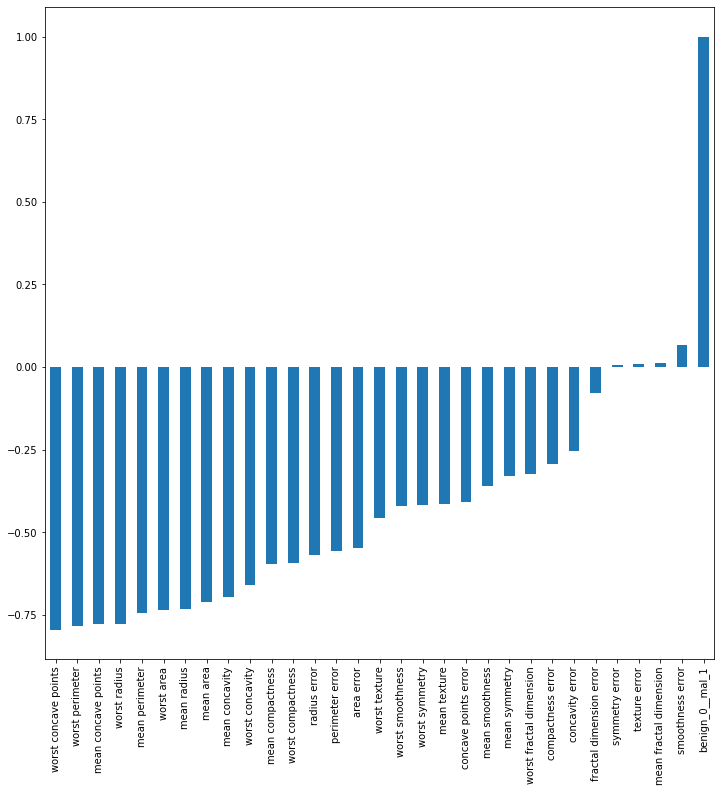

In [18]:
plt.figure(figsize = (12 , 12))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

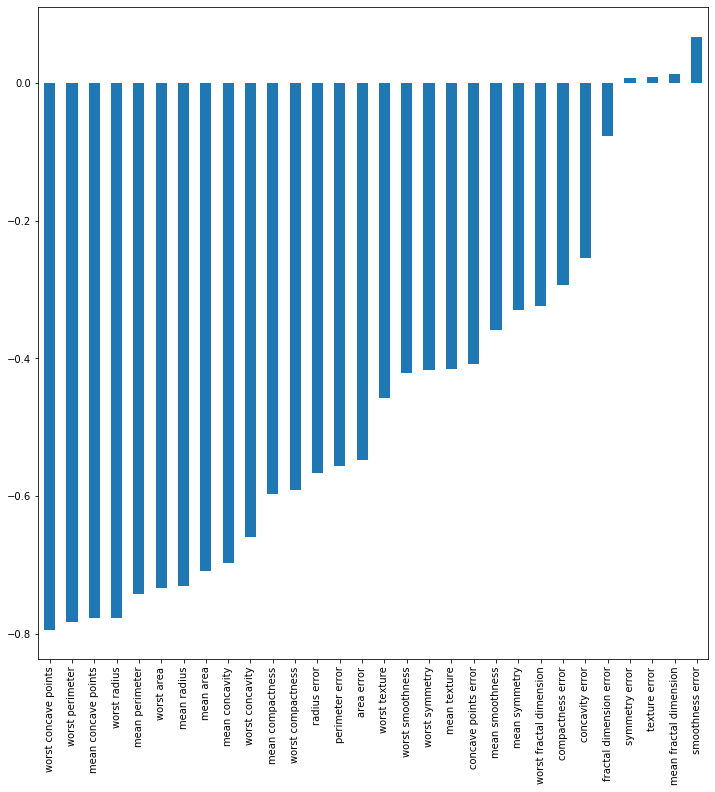

In [19]:
plt.figure(figsize = (12 , 12))
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

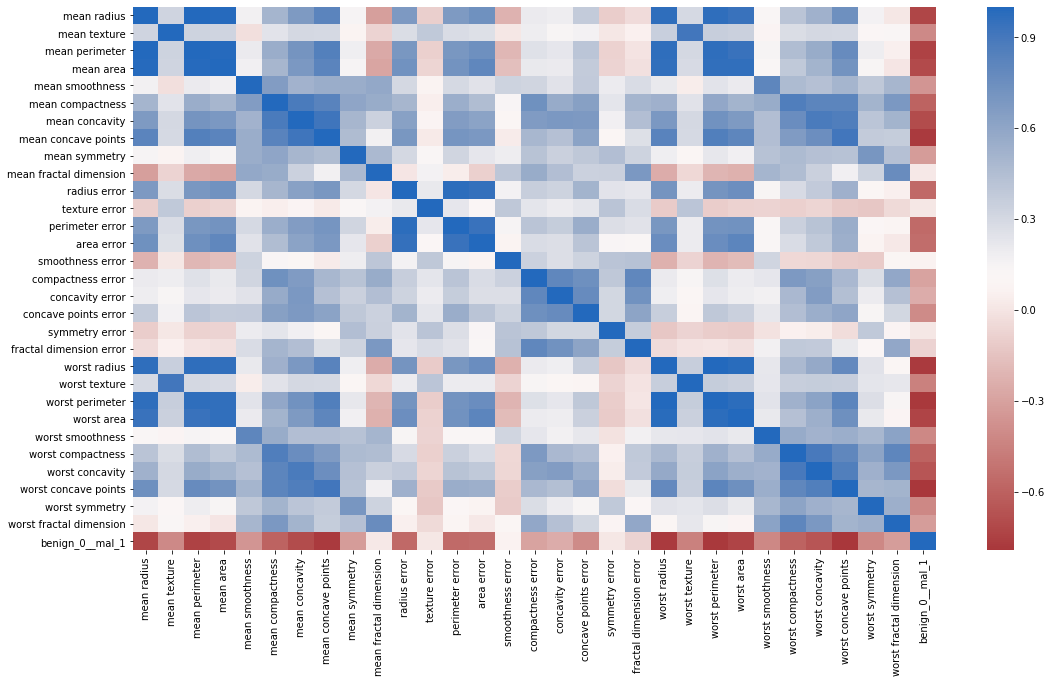

In [25]:
plt.figure(figsize = (18 , 10))
sns.heatmap(df.corr() , cmap = 'vlag_r')

## Train Test Split

In [26]:
X = df.drop('benign_0__mal_1' , axis = 1).values
y = df['benign_0__mal_1'].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)
X_test

array([[1.236e+01, 1.854e+01, 7.901e+01, ..., 8.442e-02, 2.983e-01,
        7.185e-02],
       [1.404e+01, 1.598e+01, 8.978e+01, ..., 7.453e-02, 2.725e-01,
        7.234e-02],
       [1.291e+01, 1.633e+01, 8.253e+01, ..., 8.235e-02, 3.024e-01,
        6.949e-02],
       ...,
       [1.760e+01, 2.333e+01, 1.190e+02, ..., 1.996e-01, 2.301e-01,
        1.224e-01],
       [1.162e+01, 1.818e+01, 7.638e+01, ..., 1.416e-01, 2.660e-01,
        9.270e-02],
       [1.550e+01, 2.108e+01, 1.029e+02, ..., 2.134e-01, 3.003e-01,
        1.048e-01]])


## Scaling Data

In [28]:
scaler = MinMaxScaler()

In [29]:
scaler.fit(X_train)
X_train

array([[1.317e+01, 1.822e+01, 8.428e+01, ..., 1.045e-01, 2.235e-01,
        6.925e-02],
       [1.262e+01, 1.715e+01, 8.062e+01, ..., 9.851e-02, 3.270e-01,
        7.330e-02],
       [1.480e+01, 1.766e+01, 9.588e+01, ..., 8.308e-02, 3.600e-01,
        7.285e-02],
       ...,
       [1.607e+01, 1.965e+01, 1.041e+02, ..., 1.520e-01, 2.650e-01,
        6.387e-02],
       [1.877e+01, 2.143e+01, 1.229e+02, ..., 2.048e-01, 3.679e-01,
        9.870e-02],
       [1.371e+01, 1.868e+01, 8.873e+01, ..., 1.284e-01, 2.849e-01,
        9.031e-02]])

In [30]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [31]:
model = Sequential()
model

In [32]:
model.add(Dense(units = 30 , activation = 'relu'))
model.add(Dense(units = 15 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))


model.compile(loss = 'binary_crossentropy' ,  optimizer = 'adam')

## Training the Model 

In [33]:
model.fit(x = X_train , y = y_train , epochs = 600,
          validation_data = (X_test , y_test) , verbose = 1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6587 - val_loss: 0.6345
Epoch 2/600
426/426 [==============================] - 0s 272us/sample - loss: 0.6095 - val_loss: 0.5915
Epoch 3/600
426/426 [==============================] - 0s 236us/sample - loss: 0.5663 - val_loss: 0.5419
Epoch 4/600
426/426 [==============================] - 0s 239us/sample - loss: 0.5140 - val_loss: 0.4841
Epoch 5/600
426/426 [==============================] - 0s 241us/sample - loss: 0.4638 - val_loss: 0.4338
Epoch 6/600
426/426 [==============================] - 0s 241us/sample - loss: 0.4184 - val_loss: 0.3888
Epoch 7/600
426/426 [==============================] - 0s 234us/sample - loss: 0.3773 - val_loss: 0.3471
Epoch 8/600
426/426 [==============================] - 0s 243us/sample - loss: 0.3417 - val_loss: 0.3081
Epoch 9/600
426/426 [==============================] - 0s 295us/sample - loss: 0.3074 - val_loss: 0.2750
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 293us/sample - loss: 0.0526 - val_loss: 0.1057
Epoch 79/600
426/426 [==============================] - 0s 248us/sample - loss: 0.0532 - val_loss: 0.1184
Epoch 80/600
426/426 [==============================] - 0s 255us/sample - loss: 0.0564 - val_loss: 0.1107
Epoch 81/600
426/426 [==============================] - 0s 260us/sample - loss: 0.0524 - val_loss: 0.1153
Epoch 82/600
426/426 [==============================] - 0s 241us/sample - loss: 0.0510 - val_loss: 0.1084
Epoch 83/600
426/426 [==============================] - 0s 253us/sample - loss: 0.0534 - val_loss: 0.1091
Epoch 84/600
426/426 [==============================] - 0s 242us/sample - loss: 0.0506 - val_loss: 0.1152
Epoch 85/600
426/426 [==============================] - 0s 238us/sample - loss: 0.0511 - val_loss: 0.1101
Epoch 86/600
426/426 [==============================] - 0s 236us/sample - loss: 0.0524 - val_loss: 0.1170
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 227us/sample - loss: 0.0429 - val_loss: 0.1288
Epoch 156/600
426/426 [==============================] - 0s 232us/sample - loss: 0.0418 - val_loss: 0.1349
Epoch 157/600
426/426 [==============================] - 0s 185us/sample - loss: 0.0425 - val_loss: 0.1293
Epoch 158/600
426/426 [==============================] - 0s 206us/sample - loss: 0.0438 - val_loss: 0.1500
Epoch 159/600
426/426 [==============================] - 0s 231us/sample - loss: 0.0434 - val_loss: 0.1236
Epoch 160/600
426/426 [==============================] - 0s 242us/sample - loss: 0.0439 - val_loss: 0.1412
Epoch 161/600
426/426 [==============================] - 0s 234us/sample - loss: 0.0439 - val_loss: 0.1253
Epoch 162/600
426/426 [==============================] - 0s 229us/sample - loss: 0.0420 - val_loss: 0.1324
Epoch 163/600
426/426 [==============================] - 0s 241us/sample - loss: 0.0413 - val_loss: 0.1370
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 231us/sample - loss: 0.0350 - val_loss: 0.1399
Epoch 232/600
426/426 [==============================] - 0s 253us/sample - loss: 0.0337 - val_loss: 0.1520
Epoch 233/600
426/426 [==============================] - 0s 262us/sample - loss: 0.0375 - val_loss: 0.1550
Epoch 234/600
426/426 [==============================] - 0s 234us/sample - loss: 0.0368 - val_loss: 0.1317
Epoch 235/600
426/426 [==============================] - 0s 206us/sample - loss: 0.0370 - val_loss: 0.1615
Epoch 236/600
426/426 [==============================] - 0s 227us/sample - loss: 0.0371 - val_loss: 0.1342
Epoch 237/600
426/426 [==============================] - 0s 220us/sample - loss: 0.0353 - val_loss: 0.1488
Epoch 238/600
426/426 [==============================] - 0s 318us/sample - loss: 0.0350 - val_loss: 0.1520
Epoch 239/600
426/426 [==============================] - 0s 396us/sample - loss: 0.0388 - val_loss: 0.1368
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 273us/sample - loss: 0.0302 - val_loss: 0.1313
Epoch 308/600
426/426 [==============================] - 0s 239us/sample - loss: 0.0330 - val_loss: 0.1779
Epoch 309/600
426/426 [==============================] - 0s 236us/sample - loss: 0.0344 - val_loss: 0.1353
Epoch 310/600
426/426 [==============================] - 0s 246us/sample - loss: 0.0315 - val_loss: 0.1479
Epoch 311/600
426/426 [==============================] - 0s 241us/sample - loss: 0.0280 - val_loss: 0.1535
Epoch 312/600
426/426 [==============================] - 0s 241us/sample - loss: 0.0274 - val_loss: 0.1357
Epoch 313/600
426/426 [==============================] - 0s 241us/sample - loss: 0.0274 - val_loss: 0.1617
Epoch 314/600
426/426 [==============================] - 0s 243us/sample - loss: 0.0344 - val_loss: 0.1389
Epoch 315/600
426/426 [==============================] - 0s 239us/sample - loss: 0.0346 - val_loss: 0.1756
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 269us/sample - loss: 0.0226 - val_loss: 0.1474
Epoch 384/600
426/426 [==============================] - 0s 233us/sample - loss: 0.0222 - val_loss: 0.1594
Epoch 385/600
426/426 [==============================] - 0s 239us/sample - loss: 0.0227 - val_loss: 0.1569
Epoch 386/600
426/426 [==============================] - 0s 236us/sample - loss: 0.0222 - val_loss: 0.1515
Epoch 387/600
426/426 [==============================] - 0s 239us/sample - loss: 0.0231 - val_loss: 0.1457
Epoch 388/600
426/426 [==============================] - 0s 244us/sample - loss: 0.0241 - val_loss: 0.1663
Epoch 389/600
426/426 [==============================] - 0s 246us/sample - loss: 0.0243 - val_loss: 0.1617
Epoch 390/600
426/426 [==============================] - 0s 238us/sample - loss: 0.0237 - val_loss: 0.1469
Epoch 391/600
426/426 [==============================] - 0s 239us/sample - loss: 0.0210 - val_loss: 0.1681
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 260us/sample - loss: 0.0186 - val_loss: 0.1906
Epoch 460/600
426/426 [==============================] - 0s 236us/sample - loss: 0.0168 - val_loss: 0.1658
Epoch 461/600
426/426 [==============================] - 0s 236us/sample - loss: 0.0176 - val_loss: 0.1570
Epoch 462/600
426/426 [==============================] - 0s 241us/sample - loss: 0.0172 - val_loss: 0.1754
Epoch 463/600
426/426 [==============================] - 0s 243us/sample - loss: 0.0157 - val_loss: 0.1637
Epoch 464/600
426/426 [==============================] - 0s 246us/sample - loss: 0.0165 - val_loss: 0.1732
Epoch 465/600
426/426 [==============================] - 0s 241us/sample - loss: 0.0154 - val_loss: 0.1800
Epoch 466/600
426/426 [==============================] - 0s 236us/sample - loss: 0.0158 - val_loss: 0.1753
Epoch 467/600
426/426 [==============================] - 0s 234us/sample - loss: 0.0154 - val_loss: 0.1769
Epoch 468/600
426/426 [============================

426/426 [==============================] - 0s 251us/sample - loss: 0.0119 - val_loss: 0.1774
Epoch 536/600
426/426 [==============================] - 0s 194us/sample - loss: 0.0116 - val_loss: 0.1987
Epoch 537/600
426/426 [==============================] - 0s 187us/sample - loss: 0.0120 - val_loss: 0.1973
Epoch 538/600
426/426 [==============================] - 0s 220us/sample - loss: 0.0113 - val_loss: 0.1805
Epoch 539/600
426/426 [==============================] - 0s 304us/sample - loss: 0.0137 - val_loss: 0.1762
Epoch 540/600
426/426 [==============================] - 0s 382us/sample - loss: 0.0106 - val_loss: 0.2062
Epoch 541/600
426/426 [==============================] - 0s 342us/sample - loss: 0.0123 - val_loss: 0.1735
Epoch 542/600
426/426 [==============================] - 0s 245us/sample - loss: 0.0118 - val_loss: 0.2152
Epoch 543/600
426/426 [==============================] - 0s 259us/sample - loss: 0.0138 - val_loss: 0.2023
Epoch 544/600
426/426 [============================

In [34]:
model_loss = pd.DataFrame(model.history.history)
model_loss

,loss,val_loss
0,0.658726,0.634482
1,0.609523,0.591546
2,0.566270,0.541853
3,0.513995,0.484074
4,0.463836,0.433816
...,...,...
595,0.009766,0.232364
596,0.011371,0.194605
597,0.009138,0.222318
598,0.008591,0.204052


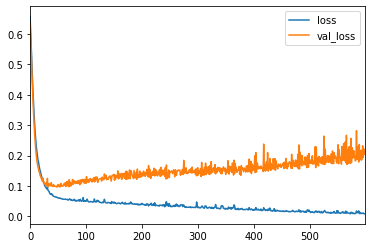

In [37]:
model_loss.plot()

In [41]:
model.fit(x = X_train , y = y_train , epochs = 300 ,
          validation_data = (X_test , y_test) , verbose = 1
          )

Train on 426 samples, validate on 143 samples
Epoch 1/300
426/426 [==============================] - 0s 232us/sample - loss: 0.0043 - val_loss: 0.2376
Epoch 2/300
426/426 [==============================] - 0s 222us/sample - loss: 0.0049 - val_loss: 0.2716
Epoch 3/300
426/426 [==============================] - 0s 204us/sample - loss: 0.0047 - val_loss: 0.2194
Epoch 4/300
426/426 [==============================] - 0s 208us/sample - loss: 0.0050 - val_loss: 0.2710
Epoch 5/300
426/426 [==============================] - 0s 213us/sample - loss: 0.0049 - val_loss: 0.2405
Epoch 6/300
426/426 [==============================] - 0s 215us/sample - loss: 0.0040 - val_loss: 0.2416
Epoch 7/300
426/426 [==============================] - 0s 208us/sample - loss: 0.0041 - val_loss: 0.2499
Epoch 8/300
426/426 [==============================] - 0s 204us/sample - loss: 0.0039 - val_loss: 0.2390
Epoch 9/300
426/426 [==============================] - 0s 211us/sample - loss: 0.0047 - val_loss: 0.2610
Epoch 10/

426/426 [==============================] - 0s 227us/sample - loss: 0.0032 - val_loss: 0.2559
Epoch 78/300
426/426 [==============================] - 0s 199us/sample - loss: 0.0026 - val_loss: 0.2601
Epoch 79/300
426/426 [==============================] - 0s 227us/sample - loss: 0.0027 - val_loss: 0.2531
Epoch 80/300
426/426 [==============================] - 0s 222us/sample - loss: 0.0027 - val_loss: 0.2818
Epoch 81/300
426/426 [==============================] - 0s 232us/sample - loss: 0.0026 - val_loss: 0.2552
Epoch 82/300
426/426 [==============================] - 0s 227us/sample - loss: 0.0025 - val_loss: 0.2789
Epoch 83/300
426/426 [==============================] - 0s 208us/sample - loss: 0.0028 - val_loss: 0.2544
Epoch 84/300
426/426 [==============================] - 0s 239us/sample - loss: 0.0025 - val_loss: 0.2570
Epoch 85/300
426/426 [==============================] - 0s 225us/sample - loss: 0.0025 - val_loss: 0.2774
Epoch 86/300
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 201us/sample - loss: 0.0016 - val_loss: 0.2827
Epoch 154/300
426/426 [==============================] - 0s 208us/sample - loss: 0.0017 - val_loss: 0.2945
Epoch 155/300
426/426 [==============================] - 0s 197us/sample - loss: 0.0018 - val_loss: 0.2919
Epoch 156/300
426/426 [==============================] - 0s 201us/sample - loss: 0.0016 - val_loss: 0.2778
Epoch 157/300
426/426 [==============================] - 0s 192us/sample - loss: 0.0016 - val_loss: 0.2841
Epoch 158/300
426/426 [==============================] - 0s 197us/sample - loss: 0.0015 - val_loss: 0.2862
Epoch 159/300
426/426 [==============================] - 0s 194us/sample - loss: 0.0018 - val_loss: 0.2723
Epoch 160/300
426/426 [==============================] - 0s 197us/sample - loss: 0.0023 - val_loss: 0.3121
Epoch 161/300
426/426 [==============================] - 0s 197us/sample - loss: 0.0019 - val_loss: 0.2743
Epoch 162/300
426/426 [============================

426/426 [==============================] - 0s 206us/sample - loss: 0.0022 - val_loss: 0.3056
Epoch 230/300
426/426 [==============================] - 0s 201us/sample - loss: 0.0016 - val_loss: 0.2867
Epoch 231/300
426/426 [==============================] - 0s 194us/sample - loss: 0.0017 - val_loss: 0.3896
Epoch 232/300
426/426 [==============================] - 0s 197us/sample - loss: 0.0024 - val_loss: 0.3439
Epoch 233/300
426/426 [==============================] - 0s 201us/sample - loss: 0.0090 - val_loss: 0.3418
Epoch 234/300
426/426 [==============================] - 0s 194us/sample - loss: 0.0244 - val_loss: 0.3637
Epoch 235/300
426/426 [==============================] - 0s 197us/sample - loss: 0.0074 - val_loss: 0.3397
Epoch 236/300
426/426 [==============================] - 0s 194us/sample - loss: 0.0025 - val_loss: 0.3255
Epoch 237/300
426/426 [==============================] - 0s 197us/sample - loss: 0.0020 - val_loss: 0.2865
Epoch 238/300
426/426 [============================

In [44]:
model1_loss = pd.DataFrame(model.history.history)

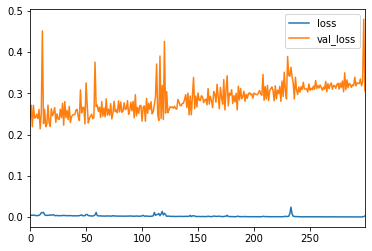

In [45]:
model1_loss.plot()

## Example Two: Early Stopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [46]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose=1, patience=25)

In [50]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6682 - val_loss: 0.6493
Epoch 2/600
426/426 [==============================] - 0s 279us/sample - loss: 0.6432 - val_loss: 0.6287
Epoch 3/600
426/426 [==============================] - 0s 208us/sample - loss: 0.6224 - val_loss: 0.6083
Epoch 4/600
426/426 [==============================] - 0s 248us/sample - loss: 0.6007 - val_loss: 0.5852
Epoch 5/600
426/426 [==============================] - 0s 400us/sample - loss: 0.5754 - val_loss: 0.5557
Epoch 6/600
426/426 [==============================] - 0s 377us/sample - loss: 0.5420 - val_loss: 0.5193
Epoch 7/600
426/426 [==============================] - 0s 213us/sample - loss: 0.5049 - val_loss: 0.4794
Epoch 8/600
426/426 [==============================] - 0s 220us/sample - loss: 0.4636 - val_loss: 0.4368
Epoch 9/600
426/426 [==============================] - 0s 206us/sample - loss: 0.4216 - val_loss: 0.3908
Epoch 10/60

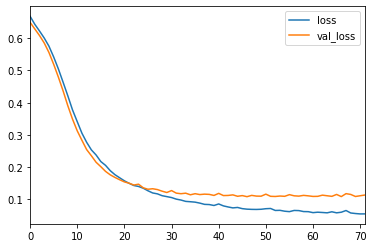

In [51]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [52]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [53]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6783 - val_loss: 0.6710
Epoch 2/600
426/426 [==============================] - 0s 286us/sample - loss: 0.6883 - val_loss: 0.6521
Epoch 3/600
426/426 [==============================] - 0s 232us/sample - loss: 0.6517 - val_loss: 0.6336
Epoch 4/600
426/426 [==============================] - 0s 283us/sample - loss: 0.6338 - val_loss: 0.6146
Epoch 5/600
426/426 [==============================] - 0s 300us/sample - loss: 0.5996 - val_loss: 0.5956
Epoch 6/600
426/426 [==============================] - 0s 240us/sample - loss: 0.5994 - val_loss: 0.5758
Epoch 7/600
426/426 [==============================] - 0s 260us/sample - loss: 0.5842 - val_loss: 0.5538
Epoch 8/600
426/426 [==============================] - 0s 229us/sample - loss: 0.5529 - val_loss: 0.5251
Epoch 9/600
426/426 [==============================] - 0s 309us/sample - loss: 0.5173 - val_loss: 0.4928
Epoch 10/60

426/426 [==============================] - 0s 468us/sample - loss: 0.1004 - val_loss: 0.1105
Epoch 78/600
426/426 [==============================] - 0s 234us/sample - loss: 0.1120 - val_loss: 0.1067
Epoch 79/600
426/426 [==============================] - 0s 260us/sample - loss: 0.1248 - val_loss: 0.1159
Epoch 80/600
426/426 [==============================] - 0s 272us/sample - loss: 0.1126 - val_loss: 0.1098
Epoch 81/600
426/426 [==============================] - 0s 250us/sample - loss: 0.1138 - val_loss: 0.1072
Epoch 82/600
426/426 [==============================] - 0s 213us/sample - loss: 0.1345 - val_loss: 0.1132
Epoch 83/600
426/426 [==============================] - 0s 274us/sample - loss: 0.1183 - val_loss: 0.1079
Epoch 84/600
426/426 [==============================] - 0s 298us/sample - loss: 0.1381 - val_loss: 0.1088
Epoch 85/600
426/426 [==============================] - 0s 288us/sample - loss: 0.1270 - val_loss: 0.1117
Epoch 86/600
426/426 [==============================] - 0s 

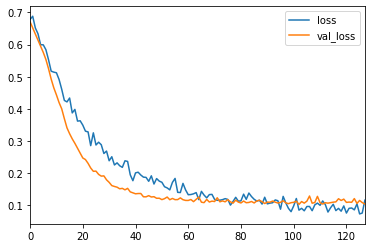

In [54]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation